# 시계열

1. 시계열의 정규성, 이분산성을 분석하기 위한 시각화

2. 시계열이 정규성이 아니라면, 고정시계열있는지 확인하고 처리

3. SARIMA분석을 통해 가장 성능 좋은걸 제시

4. 위에 제시한 모델의 잔차와 잡음에 대해 시각화하고 분석

In [28]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox
from statsmodels.tsa.stattools import ARMA, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [29]:
from tqdm import tqdm_notebook
from itertools import product

In [30]:
data = pd.read_csv('portland-oregon-average-monthly.csv', 
                   index_col = 'Month', parse_dates=['Month'])
data.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [31]:
data.columns = ['Value']

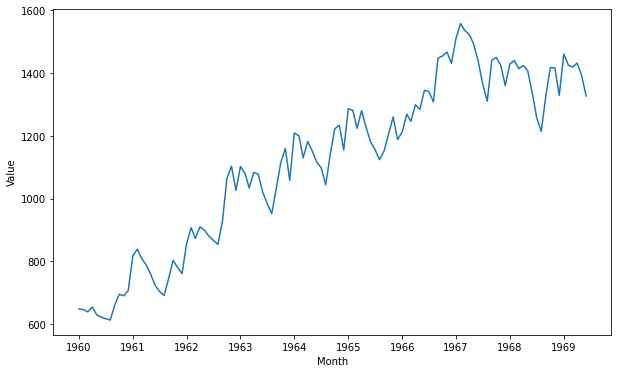

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = data.reset_index(), x='Month', y='Value')

- 추세성, 계절성이 있는것 같음

## 1. 시계열의 정규성, 이분산성 분석 및 시각화

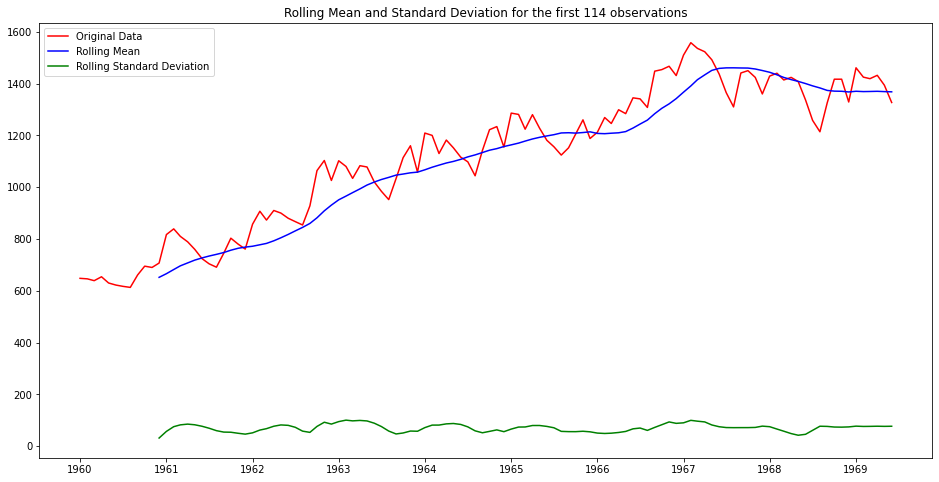

Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [33]:
def stationarity(ts, window, n):
    roll_mean = ts.rolling(window).mean()
    roll_std = ts.rolling(window).std()
    
    plt.figure(figsize = (16, 8))
    plt.plot(ts[:n], label = 'Original Data', color = 'red')
    plt.plot(roll_mean[:n], label = 'Rolling Mean', color = 'blue')
    plt.plot(roll_std[:n], label = 'Rolling Standard Deviation', color = 'green')
    plt.title("Rolling Mean and Standard Deviation for the first %d observations"%(n))
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# 원본 시계열 데이터
stationarity(data,12,len(data))

- 원본 데이터 시각
- 년도가 증가할수록 승객수의 평균 값도 증가하는 추세 있음.
- ADFuller test 결과 p-value가 0.5 -> stationary하지 않은 시계열. -> 전처리를 통해 stationary하게 바꿔줘야함

### 시계열 전처리 -1
- 로그 취해주고 diff값을 바꿔가면서 stationary검사를 해줌.

Diff : 1


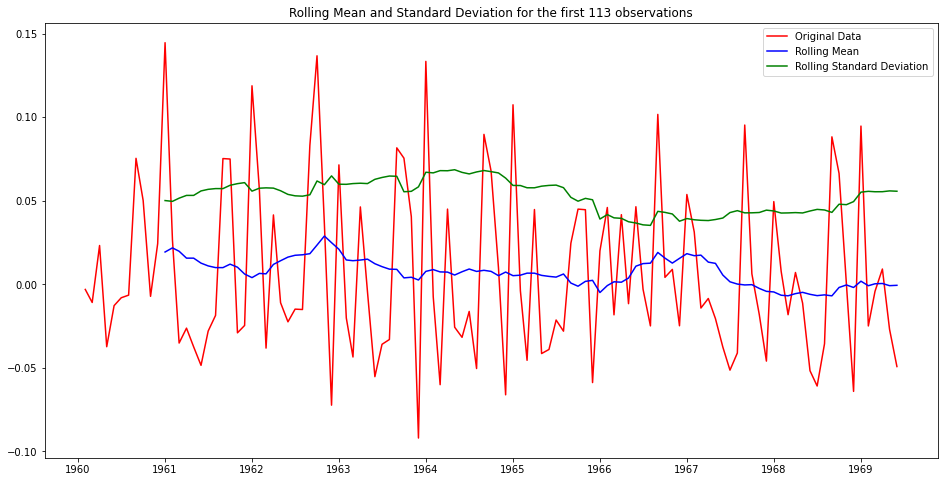

Test Statistic                  -2.047539
p-value                          0.266126
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

Diff : 2


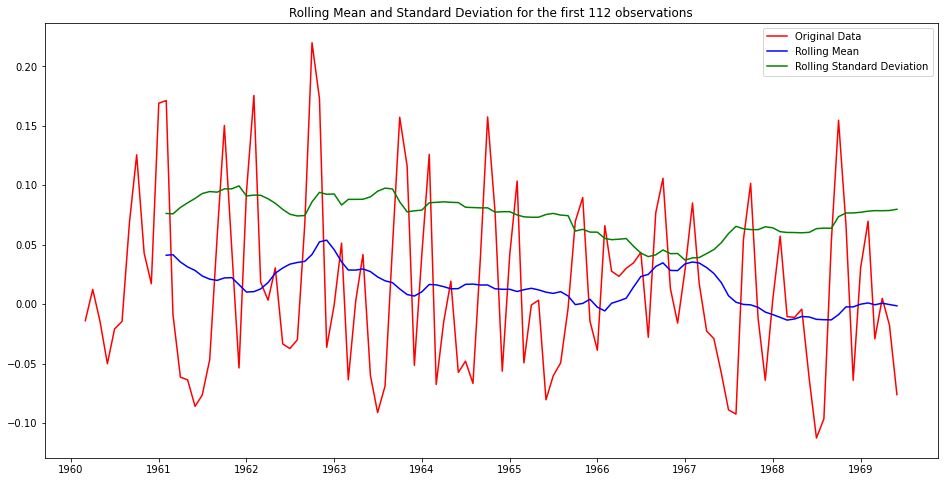

Test Statistic                  -2.050221
p-value                          0.264996
#Lags Used                      10.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

Diff : 3


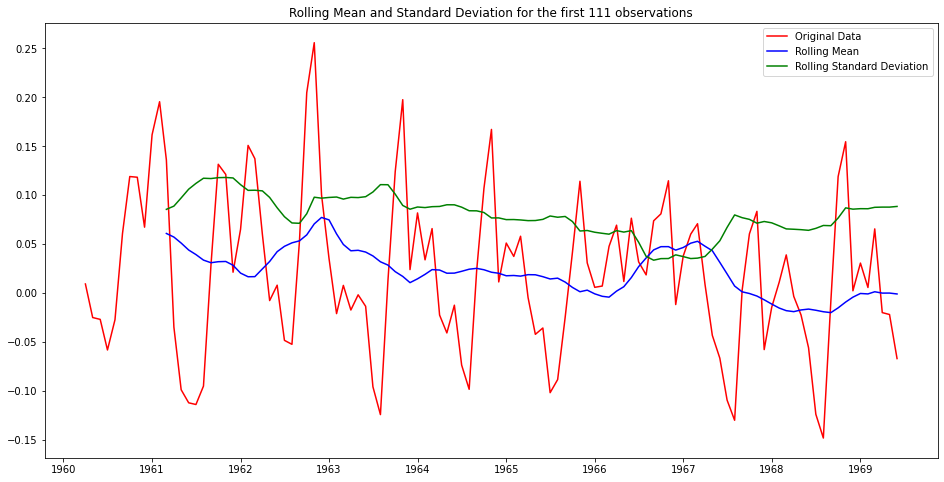

Test Statistic                  -2.038120
p-value                          0.270113
#Lags Used                       9.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

Diff : 4


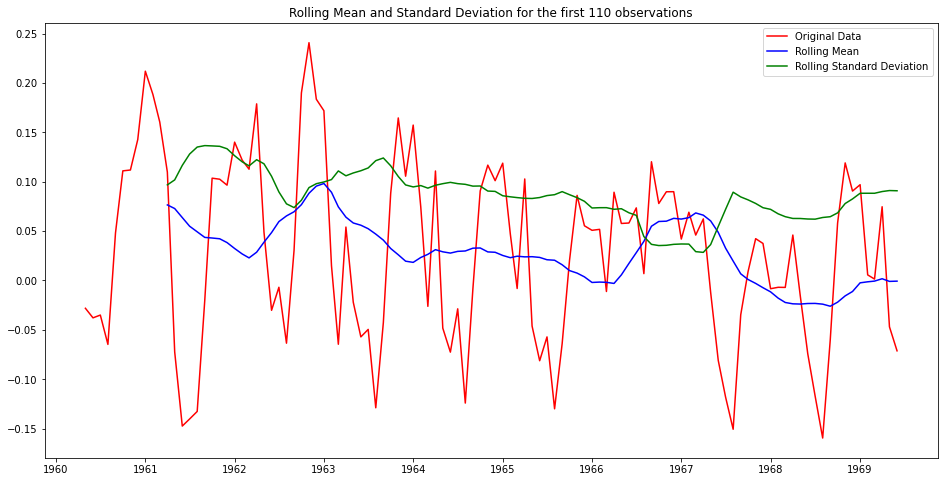

Test Statistic                  -2.029406
p-value                          0.273830
#Lags Used                       8.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

Diff : 5


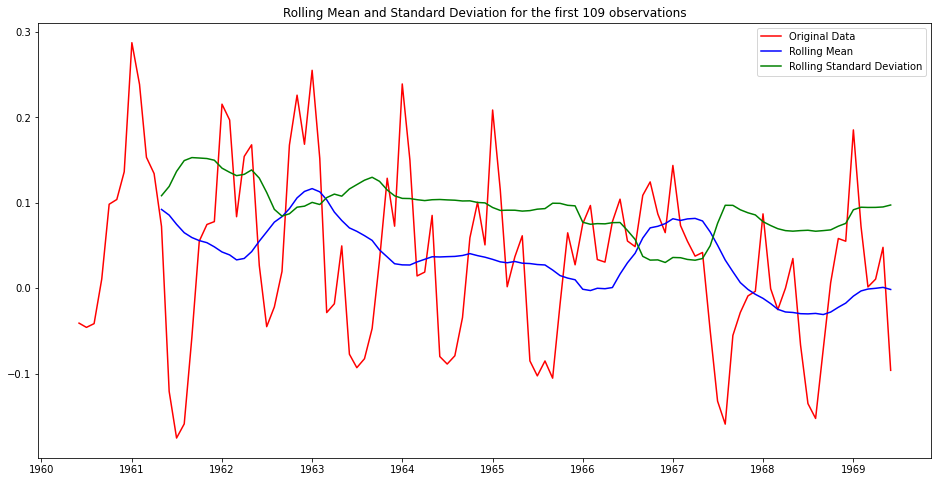

Test Statistic                 -2.448192
p-value                         0.128594
#Lags Used                     12.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64

Diff : 6


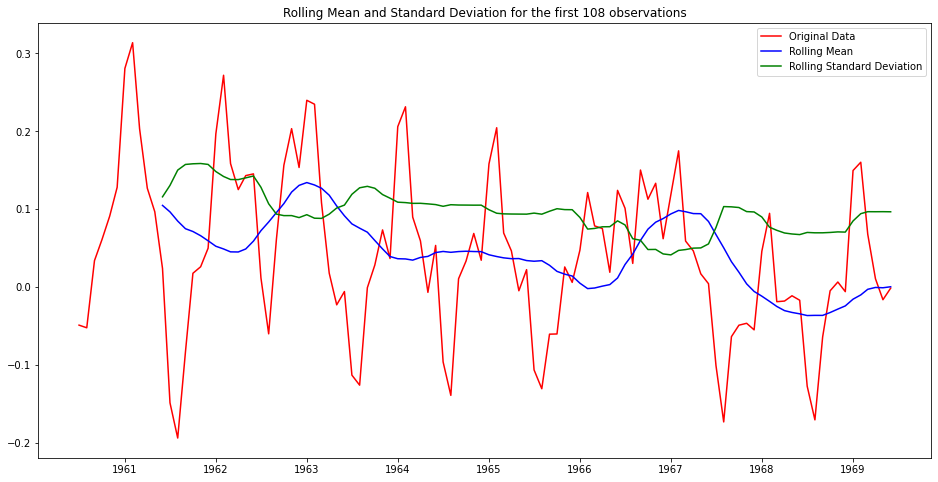

Test Statistic                  -2.013602
p-value                          0.280641
#Lags Used                       6.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

Diff : 7


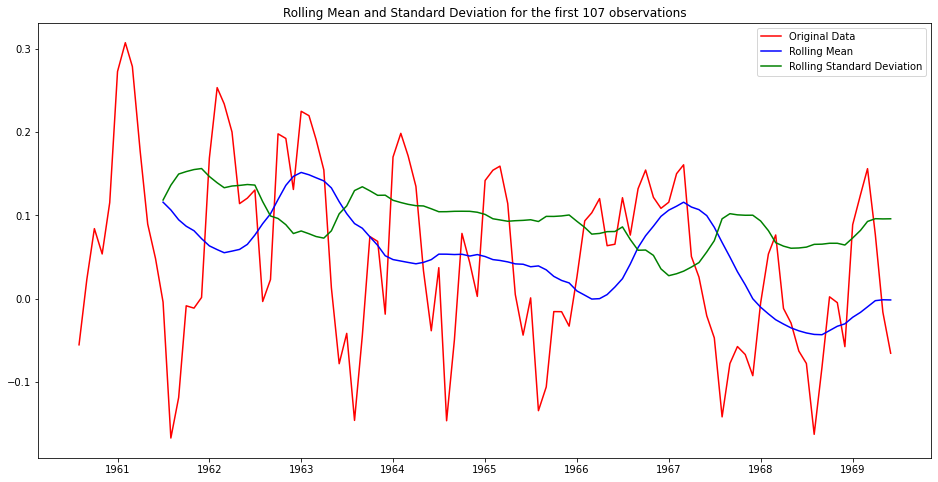

Test Statistic                 -2.950594
p-value                         0.039773
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64

Diff : 8


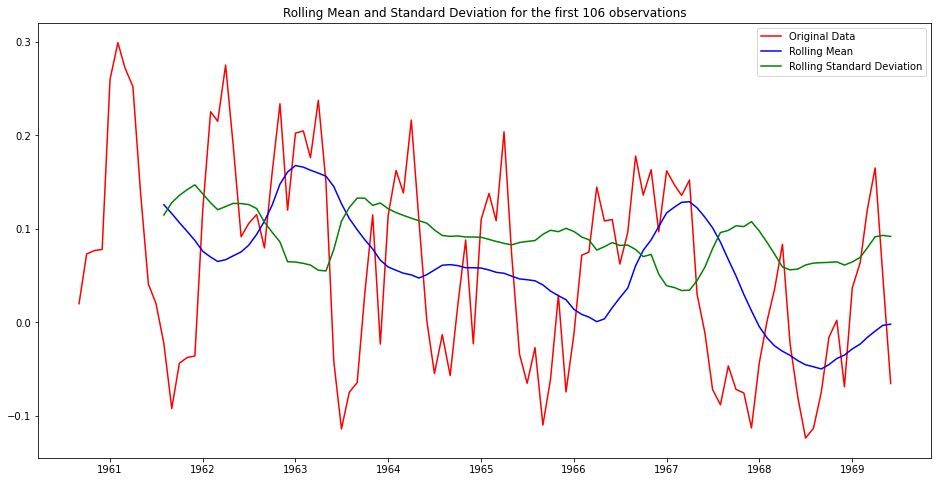

Test Statistic                 -2.699820
p-value                         0.074069
#Lags Used                     12.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64

Diff : 9


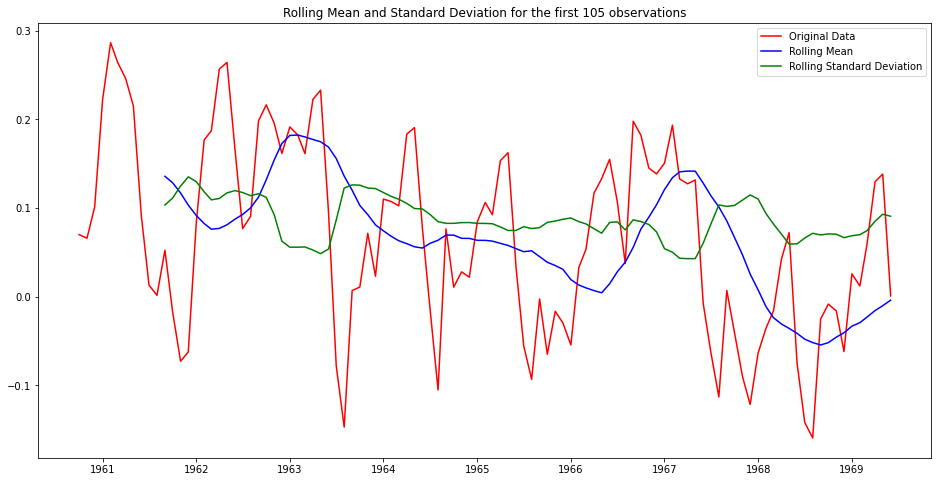

Test Statistic                 -2.743491
p-value                         0.066810
#Lags Used                     12.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64

Diff : 10


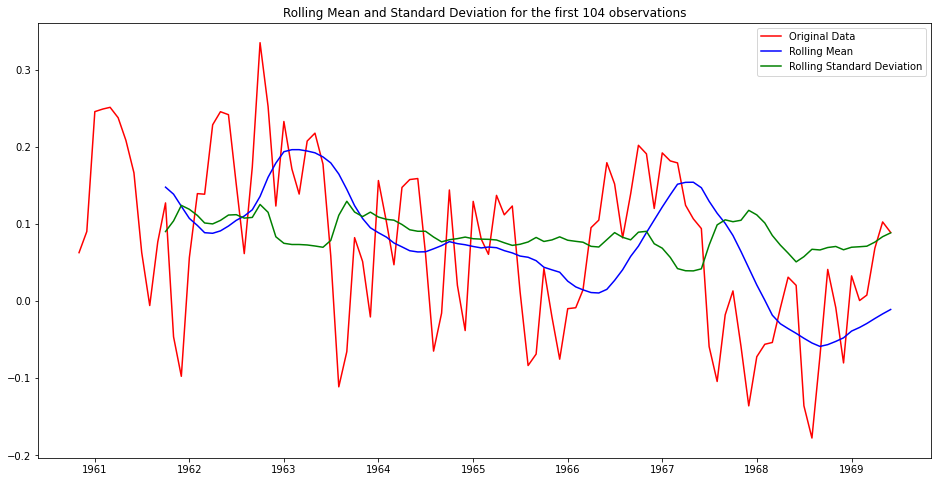

Test Statistic                 -2.501695
p-value                         0.115062
#Lags Used                     12.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64

Diff : 11


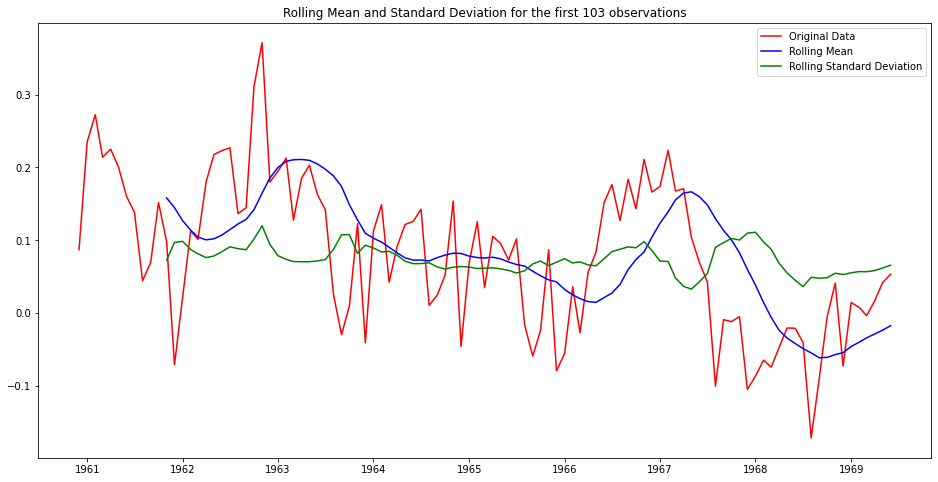

Test Statistic                 -1.442451
p-value                         0.561764
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64

Diff : 12


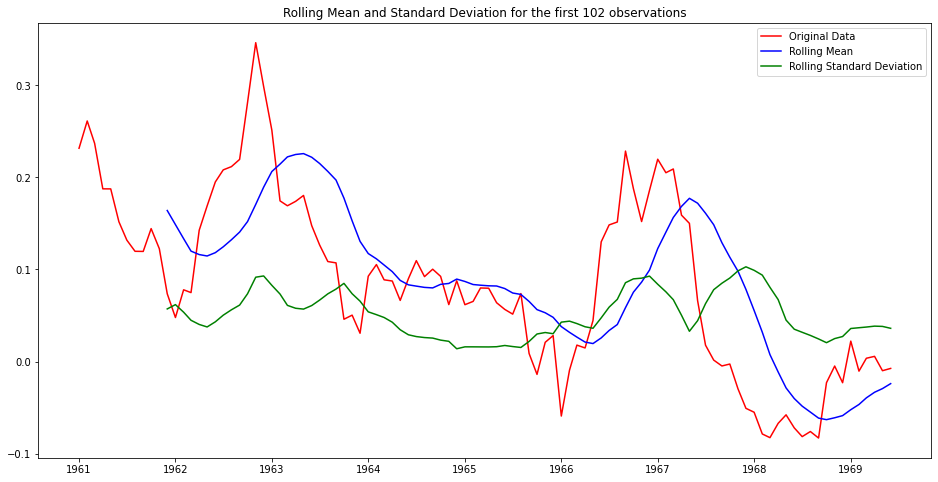

Test Statistic                  -1.919681
p-value                          0.322860
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64



In [34]:
# 최대 12개월까지 diff 적용해서 stationary한지 검사
ts_log = np.log(data)
for d in range(1, 13):
    print(f"Diff : {d}")
    ts_log_diff = ts_log - ts_log.shift(d) #differencing step
    ts_log_diff.dropna(inplace = True)
    stationarity(ts_log_diff, 12, len(ts_log_diff))
    print("=="*30)
    print()
    

### 시계열 전처리-2
- 로그 취해주고 12개월 rolling mean을 구해서 빼줌.

In [35]:
ts_log = np.log(data)
moving_average = ts_log.rolling(window=12).mean()
moving_std = ts_log.rolling(window=12).std()
ts_log_minus_moving_average = ts_log - moving_average
ts_log_minus_moving_average.dropna(inplace=True)

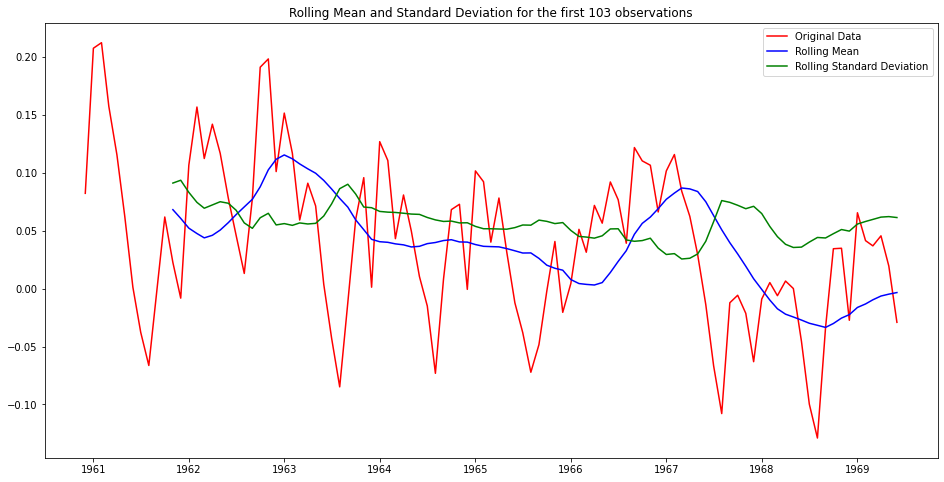

Test Statistic                 -2.579211
p-value                         0.097371
#Lags Used                     12.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [36]:
stationarity(ts_log_minus_moving_average,12,len(ts_log_minus_moving_average))

### 시계열전처리-3
- 로그 취해줌 -> 12개월 mean계산해서 빼줌 -> diff(2)수행
- ADF test 결과 p-value가 0.05 이하로 나옴.
- 이 방법으로 밑에 분석 수행

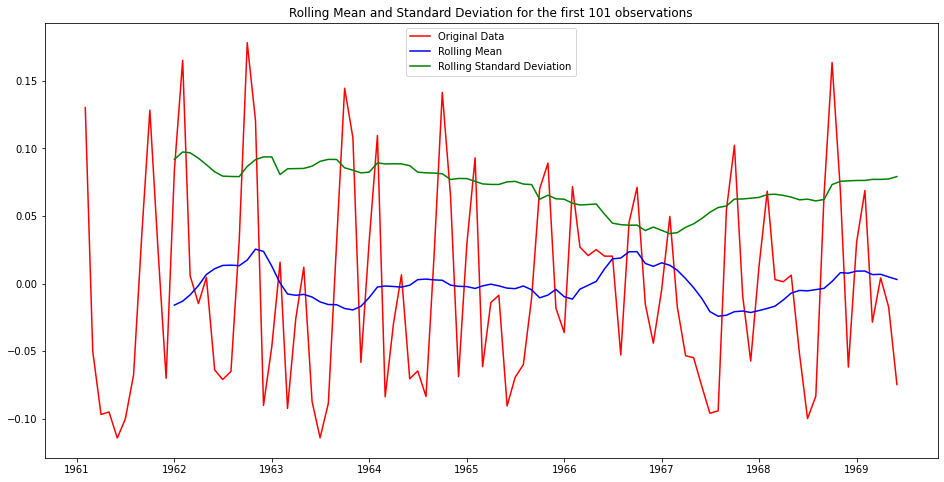

Test Statistic                 -3.103416
p-value                         0.026301
#Lags Used                     13.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [37]:
ts_log_minus_moving_average_diff = ts_log_minus_moving_average.diff(2).dropna()
stationarity(ts_log_minus_moving_average_diff,12,len(ts_log_minus_moving_average_diff))

In [132]:
ts_log_minus_moving_average.head(10)

,Value
Month,
1960-12-01,0.082282
1961-01-01,0.207578
1961-02-01,0.212365
1961-03-01,0.157428
1961-04-01,0.115522
1961-05-01,0.062441
1961-06-01,0.001260
1961-07-01,-0.037746
1961-08-01,-0.066366


In [133]:
ts_log_minus_moving_average_diff.head(10)

,Value
Month,
1961-02-01,0.130083
1961-03-01,-0.050150
1961-04-01,-0.096843
1961-05-01,-0.094987
1961-06-01,-0.114262
1961-07-01,-0.100187
1961-08-01,-0.067625
1961-09-01,0.036655
1961-10-01,0.128209


In [128]:
0.212365- 0.082282

0.130083

In [153]:
np.exp((ts_log_minus_moving_average.rolling(1).sum() + moving_average).dropna())

,Value
Month,
1960-12-01,707.0
1961-01-01,817.0
1961-02-01,839.0
1961-03-01,810.0
1961-04-01,789.0
...,...
1969-02-01,1425.0
1969-03-01,1419.0
1969-04-01,1432.0


In [154]:
plot_data = np.exp((ts_log_minus_moving_average.rolling(1).sum() + moving_average).dropna()).reset_index()

In [123]:
plot_data.head()

,Month,Value
0,1960-01-01,NaN
1,1960-02-01,NaN
2,1960-03-01,NaN
3,1960-04-01,NaN
4,1960-05-01,NaN


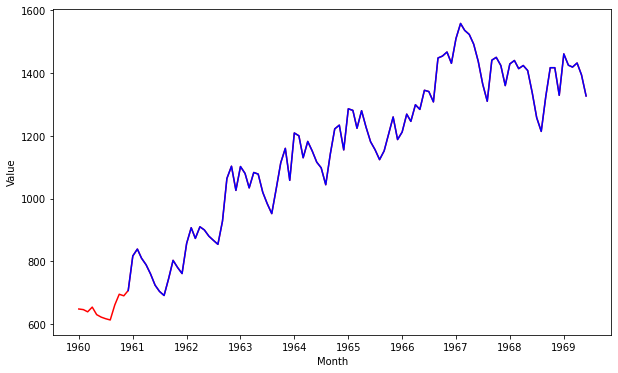

In [155]:

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = data.reset_index(), x='Month', y='Value', color='red')
sns.lineplot(data = plot_data.dropna(), x='Month', y='Value', color='blue')

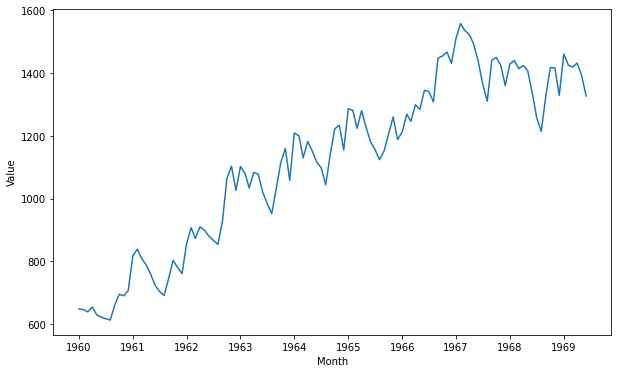

In [118]:
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = data.reset_index(), x='Month', y='Value')

,Value
Month,
1961-02-01,0.226927
1961-03-01,0.044837
1961-04-01,0.017419
1961-05-01,0.005200
1961-06-01,-0.046637
...,...
1969-02-01,0.064633
1969-03-01,-0.011181
1969-04-01,0.078832


#### 그 외 시계열 정상성테스트 통과를 위한 전처리 과정
A. Exponential weighted moving average
    - 현재와 더 가까운 시계열 값이면 가중치를 더 많이 주고, 멀어질수록 weight가 exponential하게 줄어듬.
    - 모든 과거 값에 weight부여해 평균 계산

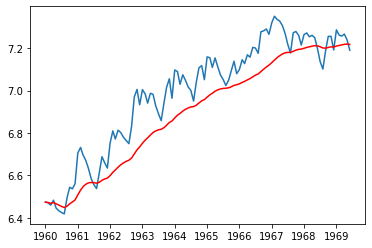

In [38]:
exp_decay_weighted_average = ts_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(exp_decay_weighted_average, color='red')

In [39]:
exp_decay_weighted_average_minus_moving_average = ts_log - exp_decay_weighted_average

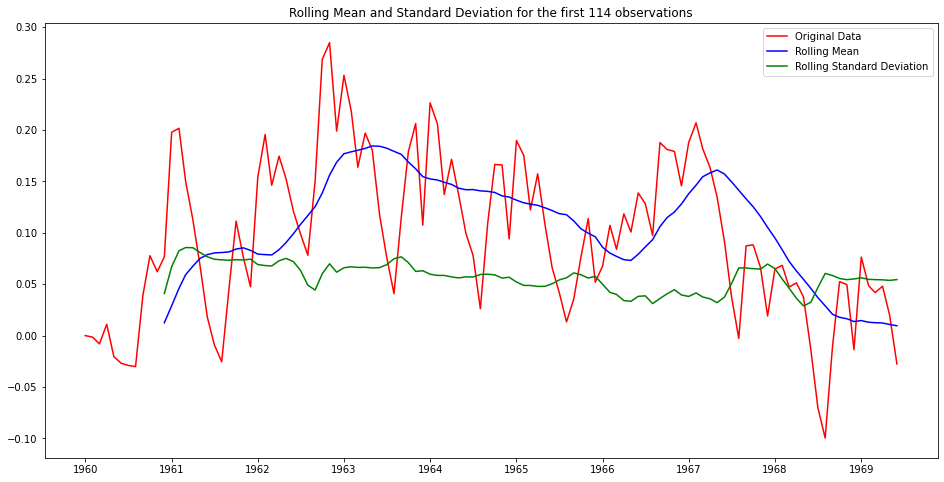

Test Statistic                  -1.598948
p-value                          0.484122
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [40]:
stationarity(exp_decay_weighted_average_minus_moving_average,12,len(exp_decay_weighted_average_minus_moving_average))

B. Trend, Seasonality, Residuals
- Trend, Seasonality를 제거한 Residual로 테스트

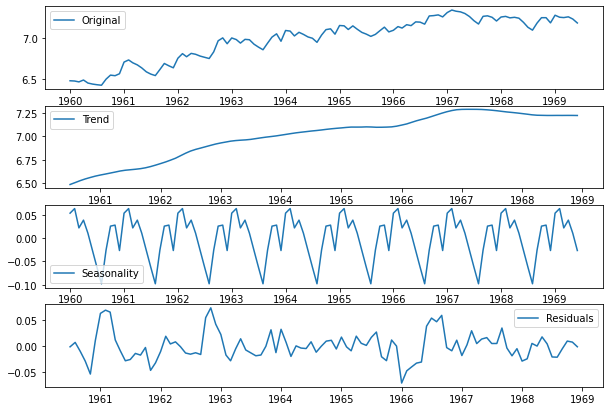

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plt.subplot(411)
plt.figure(figsize = (10,7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()

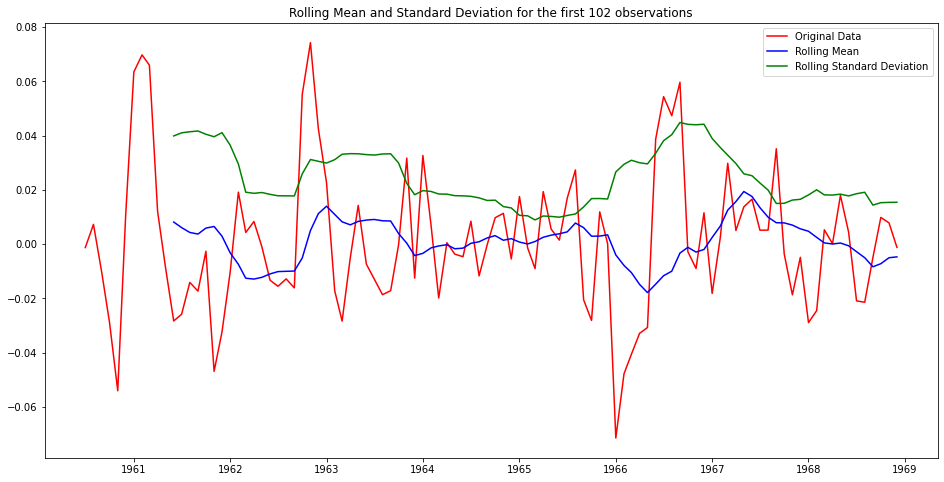

Test Statistic                -6.370421e+00
p-value                        2.352564e-08
#Lags Used                     3.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


In [57]:
decomp = residual
decomp.dropna(inplace=True)
stationarity(residual, 12, len(residual))

# 2. 시계열이 정규성이 아니라면, 고정시계열있는지 확인하고 처리


In [58]:
ts_data = data.copy()

In [59]:
ts_data = ts_data.rename_axis('order').reset_index().reset_index()
ts_data['index'] = ts_data['index'] + 1
ts_data.head()

,index,order,Value
0,1,1960-01-01,648
1,2,1960-02-01,646
2,3,1960-03-01,639
3,4,1960-04-01,654
4,5,1960-05-01,630


In [60]:
f = "Value ~ index"
mod = sm.OLS.from_formula(f, ts_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     794.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.12e-52
Time:                        23:39:22   Log-Likelihood:                -680.67
No. Observations:                 114   AIC:                             1365.
Df Residuals:                     112   BIC:                             1371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    679.3729     18.035     37.670      0.0

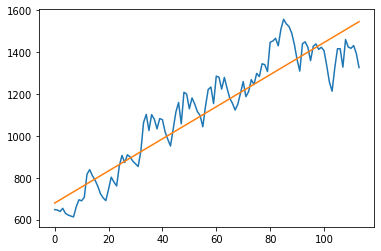

In [61]:
t = ts_data.index
y = ts_data.Value
trend1 = res.params[0] + res.params[1]*t
plt.plot(t, y, '-')
plt.plot(t, trend1, '-')
plt.show()

In [62]:
f = "Value ~ index + I(index**2)"
mod = sm.OLS.from_formula(f, ts_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     683.0
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           4.13e-63
Time:                        23:39:23   Log-Likelihood:                -652.32
No. Observations:                 114   AIC:                             1311.
Df Residuals:                     111   BIC:                             1319.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       543.1453     21.428     25.348

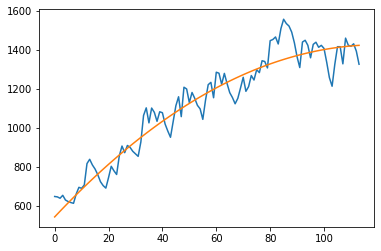

In [63]:
trend2 = res.params[0] + res.params[1] * t + res.params[2] * (t**2)
plt.plot(t, y, '-')
plt.plot(t, trend2, '-')
plt.show()

In [64]:
ts_data['cat'] = ts_data['index'] % 12
ts_data['cat'].astype('category')
f = 'Value ~ C(cat) + index + I(index**2) - 1'
mod = sm.OLS.from_formula(f, ts_data)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     175.3
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.31e-62
Time:                        23:39:23   Log-Likelihood:                -619.21
No. Observations:                 114   AIC:                             1266.
Df Residuals:                     100   BIC:                             1305.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(cat)[0]       501.1206     25.890     19.356

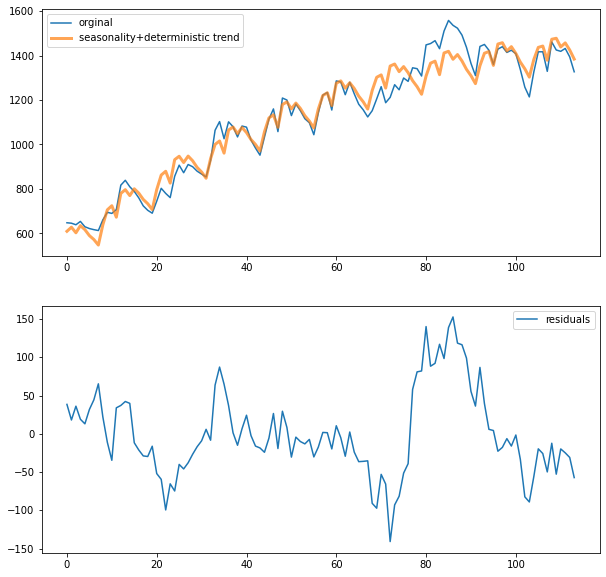

In [65]:
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(ts_data['Value'], label='orginal')
plt.plot(res.fittedvalues, label='seasonality+deterministic trend', lw=3, alpha=0.7)
plt.legend()

# residual
plt.subplot(212)
plt.plot(res.resid, label='residuals')
plt.legend()

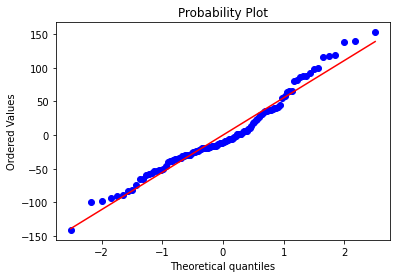

In [66]:
import scipy as sp

sp.stats.probplot(res.resid, plot=plt)
plt.show()

In [67]:
# normality test
sp.stats.shapiro(res.resid)

(0.9668038487434387, 0.006242493167519569)

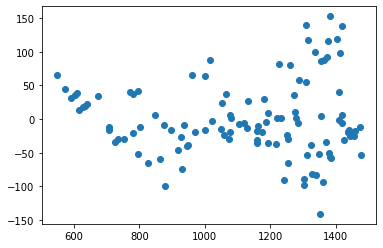

In [68]:
plt.scatter(res.fittedvalues, res.resid)
# 예측값이 커질수록 분산도 커지는 경향이 있음. 

# 3. SARIMA분석을 통해 가장 성능 좋은걸 제시

## ACF, PACF

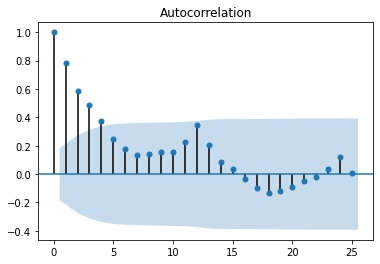

In [69]:
plot_acf(exp_decay_weighted_average_minus_moving_average,lags=25)
plt.show()

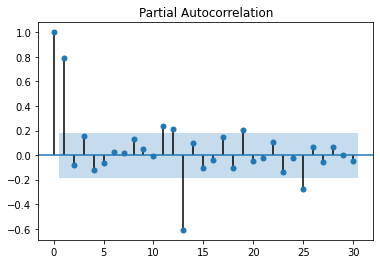

In [70]:
plot_pacf(exp_decay_weighted_average_minus_moving_average,lags=30)
plt.show()

- AR(1) model

In [75]:
p = range(0, 3, 1)
d = range(0, 3)
q = range(0, 3, 1)
P = range(0, 3, 1)
D = range(0, 3)
Q = range(0, 3, 1)
s = 6

parameters = product(p, d, q, P, D, Q)
parameters_list = list(parameters)
print(len(parameters_list))

729


In [89]:
def optimize_SARIMA(data, param, s):
    results = []
    for param in tqdm_notebook(parameters_list):
        try:
            model = sm.tsa.SARIMAX(data, order = (param[0], param[1], param[2]),
                            seasonal_order = (param[3], param[4], param[5], s)).fit(disp=-1)
        except:
            print("except")
            continue
        aic = model.aic
        results.append([param, aic])
    
    result_df = pd.DataFrame(results)
    display(result_df)
    result_df.columns = ['(p, q)x(P,Q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [92]:
result_df = optimize_SARIMA(data = ts_log_minus_moving_average_diff
                            ,param = parameters_list, s=6 )
result_df

except



,0,1
0,"(0, 0, 0, 0, 0, 0)",-242.405930
1,"(0, 0, 0, 0, 0, 1)",-242.333760
2,"(0, 0, 0, 0, 0, 2)",-273.181856
3,"(0, 0, 0, 0, 1, 0)",-144.567779
4,"(0, 0, 0, 0, 1, 1)",-229.782152
...,...,...
723,"(2, 2, 2, 2, 1, 1)",-249.637267
724,"(2, 2, 2, 2, 1, 2)",-256.558724
725,"(2, 2, 2, 2, 2, 0)",-250.770870
726,"(2, 2, 2, 2, 2, 1)",-263.062916


,"(p, q)x(P,Q)",AIC
0,"(1, 0, 2, 2, 0, 2)",-398.370441
1,"(0, 0, 1, 2, 0, 2)",-392.018633
2,"(1, 0, 1, 2, 0, 2)",-391.676175
3,"(2, 0, 1, 2, 0, 2)",-390.751862
4,"(0, 0, 2, 2, 0, 2)",-390.082343
...,...,...
723,"(1, 1, 0, 0, 2, 0)",2.208591
724,"(0, 2, 1, 0, 2, 0)",7.689806
725,"(1, 2, 1, 0, 2, 0)",9.646358
726,"(0, 2, 0, 0, 2, 0)",57.273613


In [95]:
best_model = sm.tsa.SARIMAX(ts_log_minus_moving_average_diff, order=(1, 0, 2), seasonal_order=(2, 0, 2, 6)).fit(dis=-1)
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Value   No. Observations:                  101
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 6)   Log Likelihood                 207.185
Date:                           Thu, 18 Feb 2021   AIC                           -398.370
Time:                                   23:51:57   BIC                           -377.449
Sample:                               02-01-1961   HQIC                          -389.901
                                    - 06-01-1969                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8499      0.058     14.635      0.000       0.736       0.964
ma.L1          0.0119      0.272      0.044

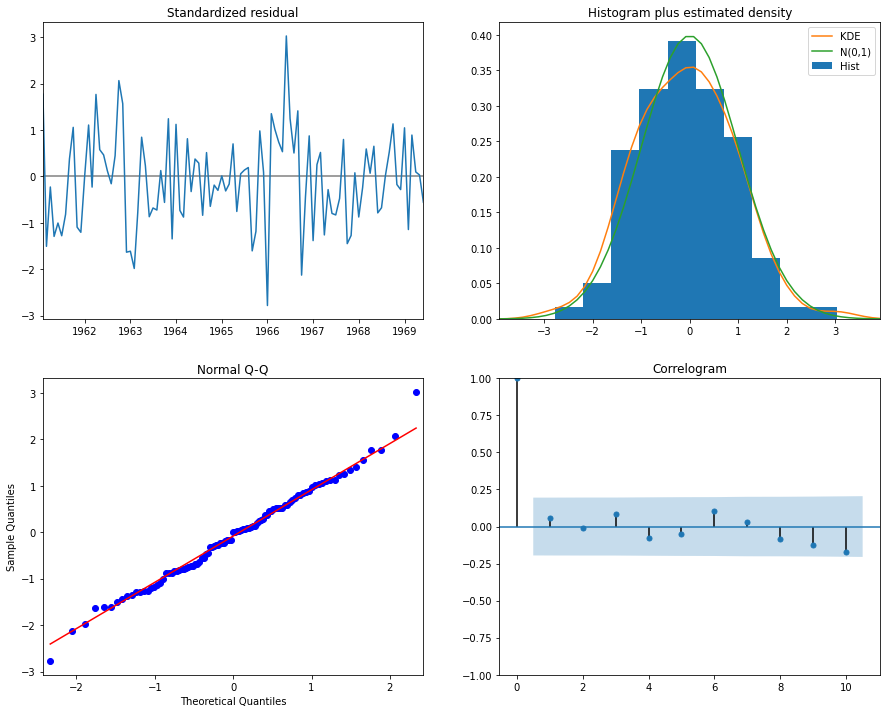

In [96]:
best_model.plot_diagnostics(figsize=(15,12))

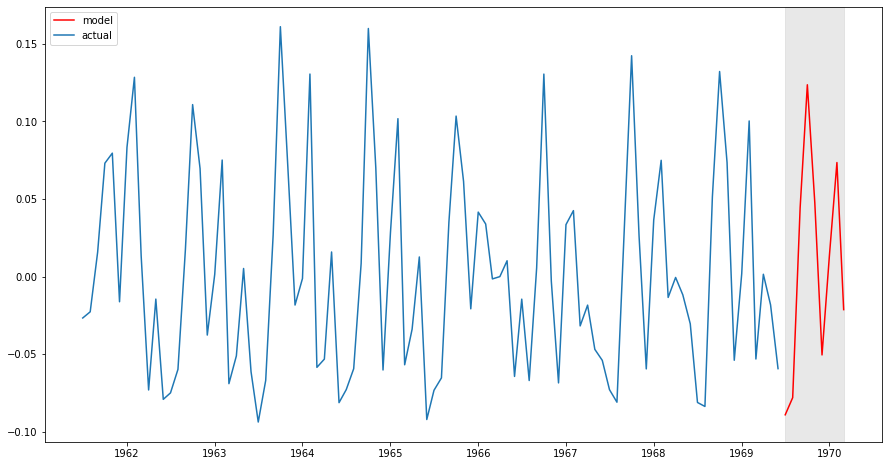

In [201]:
forecast = best_model.predict(start = result.shape[0], end = result.shape[0] + 8)
plt.figure(figsize=(15, 8))
plt.plot(forecast, color='r', label='model')
plt.axvspan(forecast.index[0], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(result, label='actual')
plt.legend()
plt.show()

- 전처리에 moving average -> forecast로 확장해줘야함(미구현)

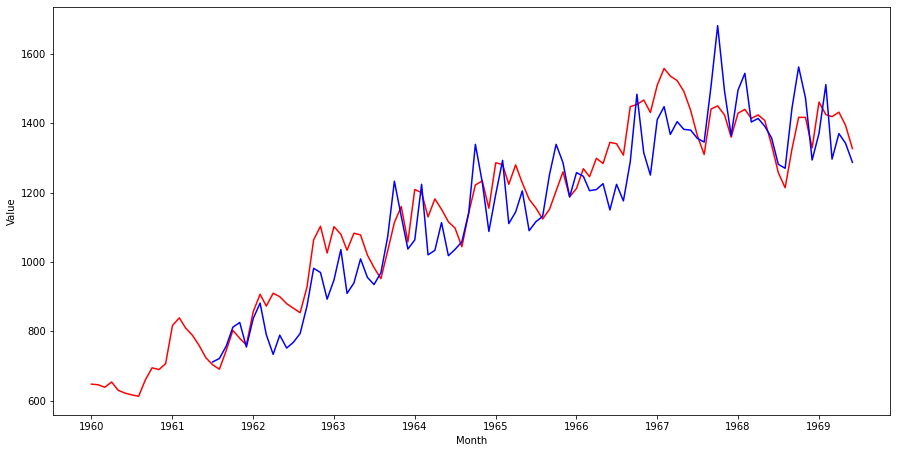

In [203]:
plot_data = np.exp(pd.Series(best_model.fittedvalues).rolling(1).sum() + moving_average['Value']).dropna()
plot_data = plot_data.reset_index().rename(columns = {0:'Value'})
plt.figure(figsize=(15, 7.5))
sns.lineplot(data = data.reset_index(), x='Month', y='Value', color='red')
sns.lineplot(data = plot_data, x='Month', y='Value', color='blue')